In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import stats

In [38]:
# read in data file
readcsv = pd.read_csv("Data.csv")
readcsv.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [39]:
sandbox = readcsv.copy()

In [40]:
# filter out rows with no listing price
sandbox.drop(sandbox[sandbox["Listing Price"] == 0].index, inplace = True)

In [41]:
# filter out rows with no reviews
sandbox.drop(sandbox[sandbox["Reviews"] == 0].index, inplace = True)
len(sandbox)

2752

In [42]:
# filter out rows with no ratings
sandbox.drop(sandbox[sandbox["Rating"] == 0].index, inplace = True)
len(sandbox)

2680

In [43]:
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [44]:
#add columns for Adidas/Nike distinction and gender market
sandbox['True_Brand']= ""
sandbox['Gender'] = ""
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,,


In [45]:
#finding array of unique brands (justifying our Nike or Adidas logic)
sandbox["Brand"].unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [46]:
#loop through rows to create binary Nike/ Adidas column
# for index, row in sandbox.iterrows():
#     try:
        
        
for index, row in sandbox.iterrows():
    Brand_Name = row["Brand"]
    
    if Brand_Name == 'Nike':
        sandbox.loc[[index], "True_Brand"]= "Nike"
    else:
        sandbox.loc[[index], "True_Brand"]= "Adidas"
sandbox

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,
...,...,...,...,...,...,...,...,...,...,...,...,...
3248,Nike Zoom Pegasus Turbo XX,AR4347-600,16995,13597,0,Nike,"Bridging performance and style, the Nike Zoom ...",1.0,1,2020-04-13T15:38:54,Nike,
3255,Nike Zoom Pegasus Turbo 2 Special Edition,BV7757-500,15995,12797,0,Nike,The Nike Zoom Pegasus Turbo 2 is updated with ...,5.0,1,2020-04-13T15:39:05,Nike,
3261,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,"In spiritual circles, the colour purple repres...",4.4,10,2020-04-13T15:40:56,Nike,
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01,Nike,


In [47]:
#Do the same thing for gender
# sandbox.loc[[index], "True_Brand"]= "Nike"

for index, row in sandbox.iterrows():
    #sandbox['Product_Name'] = row["Product_Name"]
    if row["Product Name"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Product Name"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Product Name"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      

    elif row["Description"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Description"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Description"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      
    else:
        sandbox.loc[index, "Gender"]= "Unknown"
sandbox["Gender"].unique()

array(['Women', 'Men', 'Unisex', 'Unknown'], dtype=object)

In [48]:
# Create Average shoe rating for each brand by gender; total, men, women, unisex, unknown
# ADIDAS: Total, Men, Women, Uni, Unknown------------------------------------------------
adi_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng = adi_rtng_df["Rating"].mean()
adi_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
adi_rtng_man_df = adi_rtng_man_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng_man = adi_rtng_man_df["Rating"].mean()
adi_rtg_women_df = sandbox.loc[sandbox["Gender"] == "Women"]
adi_rtg_women_df = adi_rtg_women_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_women = adi_rtg_women_df["Rating"].mean()
adi_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
adi_rtg_uni_df = adi_rtg_uni_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_uni = adi_rtg_uni_df["Rating"].mean()
adi_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
adi_rtg_unkn_df = adi_rtg_unkn_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_unkn = adi_rtg_unkn_df["Rating"].mean()
# NIKE: Total, men, women, Uni, Unknown---------------------------------------------------
nike_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng = nike_rtng_df["Rating"].mean()
nike_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
nike_rtng_man_df = nike_rtng_man_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_man = nike_rtng_man_df["Rating"].mean()
nike_rtng_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
nike_rtng_woman_df = nike_rtng_woman_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_woman = nike_rtng_woman_df["Rating"].mean()
nike_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
nike_rtg_uni_df = nike_rtg_uni_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_uni = nike_rtg_uni_df["Rating"].mean()
nike_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
nike_rtg_unkn_df = nike_rtg_unkn_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_unkn = nike_rtg_unkn_df["Rating"].mean()

Text(0.5, 1.0, 'Adidas vs. Nike: avg product rating by gender')

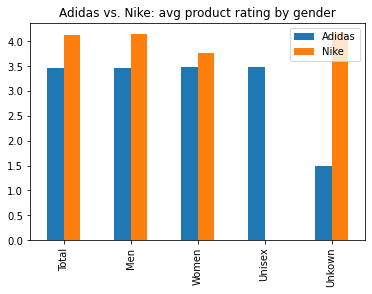

In [49]:
# Plot Nike vs. Adidas by gender
ratingsplotdata = pd.DataFrame(
    {"Adidas": [adi_rtng, adi_rtng_man, adi_rtg_women, adi_rtg_uni, adi_rtg_unkn],
    "Nike": [nike_rtng, nike_rtng_man, nike_rtng_woman, nike_rtg_uni, nike_rtg_unkn]}, 
    index=["Total", "Men", "Women", "Unisex", "Unkown"])
# Plot a bar chart
ratingsplotdata.plot(kind="bar")
plt.title("Adidas vs. Nike: avg product rating by gender")

In [50]:
# add columns for Listing Price $, Sale Price $, and Discount $ 
sandbox["Listing Price $"]= ""
sandbox["Sale Price $"]= ""
sandbox["Discount $"]= ""
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender,Listing Price $,Sale Price $,Discount $
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,Women,,,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,Women,,,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,Women,,,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,Women,,,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,Women,,,


In [51]:
# populate columns for Listing Price $, Sale Price $, and Discount $ 
for row in sandbox:
    sandbox["Listing Price $"] = sandbox["Listing Price"]/100
    sandbox["Sale Price $"] = sandbox["Sale Price"]/100
    discount = sandbox["Listing Price $"] - sandbox["Sale Price $"]
    sandbox["Discount $"] = discount
sandbox.head()    

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender,Listing Price $,Sale Price $,Discount $
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,Women,149.99,74.99,75.0
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,Women,75.99,37.99,38.0
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,Women,9.99,5.99,4.0
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,Women,69.99,34.99,35.0
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,Women,79.99,39.99,40.0


In [52]:
# Discount Comparison
MSRP = []
SalePrice = []
MSRP_Rounded = []
SalePrice_Rounded = []
for price in sandbox["Listing Price"]:
    MSRP.append(sandbox["Listing Price"]/100)
    MSRP_Rounded.append(round(sandbox["Listing Price"]/100,0))

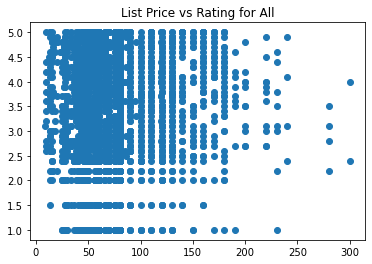

In [53]:
Rating = sandbox["Rating"]
Rating

list_price = sandbox["Listing Price $"]
list_price

plt.scatter(list_price, Rating )
plt.title("List Price vs Rating for All")
plt.show()

In [54]:
adidas_file = sandbox.loc[sandbox["True_Brand"] == "Adidas"]

nike_file = sandbox.loc[sandbox["True_Brand"] == "Nike"]

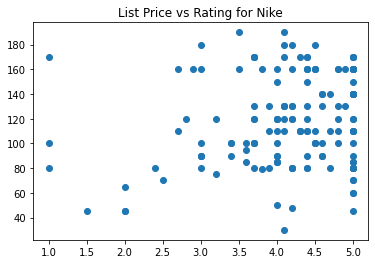

In [55]:
adidas_rating = adidas_file["Rating"]
adidas_price = adidas_file["Listing Price $"]

nike_rating = nike_file["Rating"]
nike_price = nike_file["Listing Price $"]

plt.scatter(nike_rating, nike_price)
plt.title("List Price vs Rating for Nike")
plt.show()

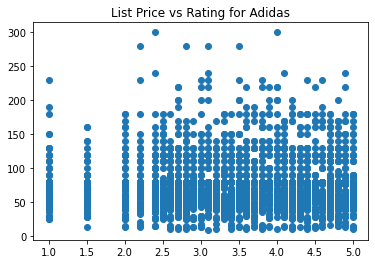

In [56]:
plt.scatter(adidas_rating,adidas_price)
plt.title("List Price vs Rating for Adidas")
plt.show()

The r-squared value is: 0.00014861368068691964


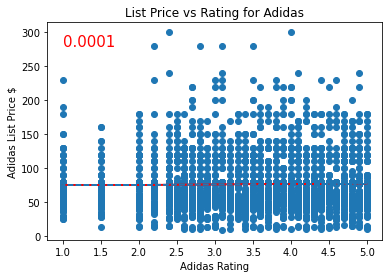

In [112]:
nike_slope, nike_int, nike_r, nike_p, nike_std_err = stats.linregress(nike_rating, nike_price)
nike_fit = nike_slope * nike_rating + nike_int

ad_slope, ad_int, ad_r, ad_p, ad_std_err = stats.linregress(adidas_rating, adidas_price)
ad_fit = ad_slope * adidas_rating + ad_int


(slope, intercept, rvalue, pvalue, stderr) = linregress(adidas_rating,adidas_price)
regress_values = adidas_rating * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(adidas_rating,regress_values,"r-")
# plt.annotate(line_eq,(1,280),fontsize=15,color="red")
plt.annotate(round((rvalue**2),4),(1,280),fontsize=15,color="red")
plt.scatter(adidas_rating,adidas_price)
plt.title("List Price vs Rating for Adidas")
plt.ylabel('Adidas List Price $')
plt.xlabel('Adidas Rating')
plt.plot(adidas_rating, ad_fit, "--")
print(f"The r-squared value is: {rvalue**2}")

The r-squared value is: 0.032239940823873735


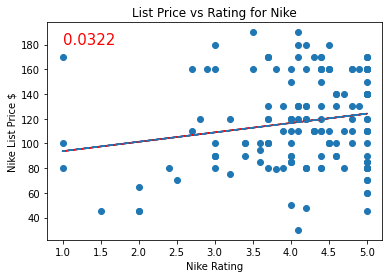

In [110]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nike_rating,nike_price)
regress_values = nike_rating * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nike_rating,regress_values,"r-")
# plt.annotate(line_eq,(1,180),fontsize=15,color="red")
plt.annotate(round((rvalue**2),4),(1,180),fontsize=15,color="red")
plt.scatter(nike_rating,nike_price)
plt.title("List Price vs Rating for Nike")
plt.ylabel('Nike List Price $')
plt.xlabel('Nike Rating')
plt.plot(nike_rating, nike_fit, "--")
print(f"The r-squared value is: {rvalue**2}")

In [91]:
adidas_men = adidas_file.loc[adidas_file["Gender"] == "Men"]
adidas_women = adidas_file.loc[adidas_file["Gender"] == "Women"]
adidas_unisex = adidas_file.loc[adidas_file["Gender"] == "Unisex"]

nike_men = nike_file.loc[nike_file["Gender"] == "Men"]
nike_women = nike_file.loc[nike_file["Gender"] == "Women"]
nike_unisex = nike_file.loc[nike_file["Gender"] == "Unisex"]


Product Name        object
Product ID          object
Listing Price        int64
Sale Price           int64
Discount             int64
Brand               object
Description         object
Rating             float64
Reviews              int64
Last Visited        object
True_Brand          object
Gender              object
Listing Price $    float64
Sale Price $       float64
Discount $         float64
dtype: object

The r-squared value is: 3.586457310079577e-06


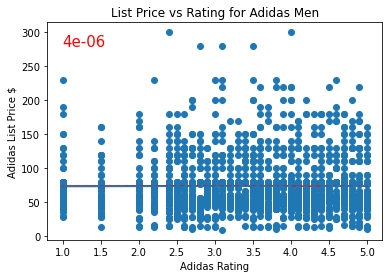

In [114]:
adidasmen_rating = adidas_men["Rating"]
adidasmen_price = adidas_men["Listing Price $"]

nikemen_rating = nike_men["Rating"]
nikemen_price = nike_men["Listing Price $"]

adidaswomen_rating = adidas_women["Rating"]
adidaswomen_price = adidas_women["Listing Price $"]

nikewomen_rating = nike_women["Rating"]
nikewomen_price = nike_women["Listing Price $"]

admen_slope, admen_int, admen_r, admen_p, admen_std_err = stats.linregress(adidasmen_rating, adidasmen_price)
admen_fit = admen_slope * adidasmen_rating + admen_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(adidasmen_rating,adidasmen_price)
regress_values = adidasmen_rating * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(adidasmen_rating,regress_values,"r-")
# plt.annotate(line_eq,(1,180),fontsize=15,color="red")
plt.annotate(round((rvalue**2),6),(1,280),fontsize=15,color="red")
plt.scatter(adidasmen_rating,adidasmen_price)
plt.title("List Price vs Rating for Adidas Men")
plt.ylabel('Adidas List Price $')
plt.xlabel('Adidas Rating')
plt.plot(adidasmen_rating, admen_fit, "--")
print(f"The r-squared value is: {rvalue**2}")

The r-squared value is: 0.11564926604483164


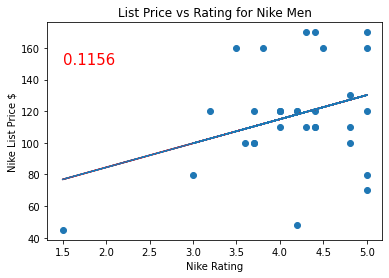

In [116]:
nikemen_slope, nikemen_int, nikemen_r, nikemen_p, nikemen_std_err = stats.linregress(nikemen_rating, nikemen_price)
nikemen_fit = nikemen_slope * nikemen_rating + nikemen_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(nikemen_rating,nikemen_price)
regress_values = nikemen_rating * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nikemen_rating,regress_values,"r-")
# plt.annotate(line_eq,(1,180),fontsize=15,color="red")
plt.annotate(round((rvalue**2),4),(1.5,150),fontsize=15,color="red")
plt.scatter(nikemen_rating,nikemen_price)
plt.title("List Price vs Rating for Nike Men")
plt.ylabel('Nike List Price $')
plt.xlabel('Nike Rating')
plt.plot(nikemen_rating, nikemen_fit, "--")
print(f"The r-squared value is: {rvalue**2}")

The r-squared value is: 0.002558160823361263


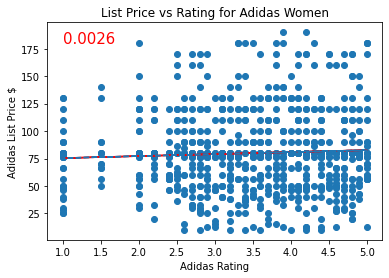

In [117]:
adwomen_slope, adwomen_int, adwomen_r, adwomen_p, adwomen_std_err = stats.linregress(adidaswomen_rating, adidaswomen_price)
adwomen_fit = adwomen_slope * adidaswomen_rating + adwomen_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(adidaswomen_rating,adidaswomen_price)
regress_values = adidaswomen_rating * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(adidaswomen_rating,regress_values,"r-")
# plt.annotate(line_eq,(1,180),fontsize=15,color="red")
plt.annotate(round((rvalue**2),4),(1,180),fontsize=15,color="red")
plt.scatter(adidaswomen_rating,adidaswomen_price)
plt.title("List Price vs Rating for Adidas Women")
plt.ylabel('Adidas List Price $')
plt.xlabel('Adidas Rating')
plt.plot(adidaswomen_rating, adwomen_fit, "--")
print(f"The r-squared value is: {rvalue**2}")

The r-squared value is: 0.3731197912392754


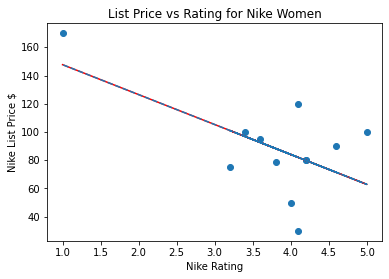

In [98]:
nikewomen_slope, nikewomen_int, nikewomen_r, nikewomen_p, nikewomen_std_err = stats.linregress(nikewomen_rating, nikewomen_price)
nikewomen_fit = nikewomen_slope * nikewomen_rating + nikewomen_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(nikewomen_rating,nikewomen_price)
regress_values = nikewomen_rating * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nikewomen_rating,regress_values,"r-")
plt.annotate(line_eq,(1,180),fontsize=15,color="red")
plt.scatter(nikewomen_rating,nikewomen_price)
plt.title("List Price vs Rating for Nike Women")
plt.ylabel('Nike List Price $')
plt.xlabel('Nike Rating')
plt.plot(nikewomen_rating, nikewomen_fit, "--")
print(f"The r-squared value is: {rvalue**2}")

In [99]:
nike_women

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender,Listing Price $,Sale Price $,Discount $
2646,Nike SB Bruin High,923112-001,7995,5597,0,Nike,The first Nike SB shoe designed specifically f...,4.2,6,2020-04-13T15:28:04,Nike,Women,79.95,55.97,23.98
3019,Nike Air Max 90 NS SE,881105-800,9995,7997,0,Nike,The Nike Air Max 90 SE Women's Shoe combines c...,5.0,2,2020-04-13T15:32:45,Nike,Women,99.95,79.97,19.98
3034,Nike Odyssey React Flyknit 2,AH1016-602,9995,5997,0,Nike,The Nike Odyssey React Flyknit 2 Women's Runni...,3.4,26,2020-04-13T15:32:49,Nike,Women,99.95,59.97,39.98
3058,Nike Air Force 1 Mid '07,366731-100,7895,6317,0,Nike,The legend lives on in the Nike Air Force 1 Mi...,3.8,4,2020-04-13T15:34:31,Nike,Women,78.95,63.17,15.78
3076,Nike Benassi JDI Floral,618919-031,2995,2397,0,Nike,The Nike Benassi JDI Floral Women's Slide is d...,4.1,8,2020-04-13T15:34:46,Nike,Women,29.95,23.97,5.98
3157,Nike SB Bruin High,923112-001,7995,5597,0,Nike,The first Nike SB shoe designed specifically f...,4.2,6,2020-04-13T15:36:45,Nike,Women,79.95,55.97,23.98
3167,Nike Air Huarache Ultra,885118-001,8995,7197,0,Nike,The Nike Air Huarache Ultra Women's Sandal hel...,4.6,12,2020-04-13T15:36:48,Nike,Women,89.95,71.97,17.98
3174,Nike Flex RN 2018,AA7408-008,7495,5997,0,Nike,The Nike Flex RN 2018 Women's Running Shoe del...,3.2,15,2020-04-13T15:36:50,Nike,Women,74.95,59.97,14.98
3212,Nike Tanjun,812655-011,4995,3997,0,Nike,"Named after the Japanese word for simplicity, ...",4.0,53,2020-04-13T15:37:01,Nike,Women,49.95,39.97,9.98
3213,Nike Air Max 90,325213-139,9495,7597,0,Nike,The Nike Air Max 90 Women's Shoe honours its r...,3.6,5,2020-04-13T15:37:01,Nike,Women,94.95,75.97,18.98


The r-squared value is: 0.0072495888647174265


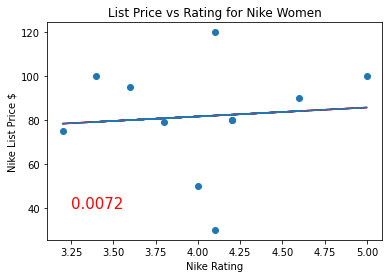

In [119]:
nike_women_drop = nike_women.drop(index=3248)
nike_women_drop

nikewomendrop_rating = nike_women_drop["Rating"]
nikewomendrop_price = nike_women_drop["Listing Price $"]

nikewomendrop_slope, nikewomendrop_int, nikewomendrop_r, nikewomendrop_p, nikewomendrop_std_err = stats.linregress(nikewomendrop_rating, nikewomendrop_price)
nikewomendrop_fit = nikewomendrop_slope * nikewomendrop_rating + nikewomendrop_int

(slope, intercept, rvalue, pvalue, stderr) = linregress(nikewomendrop_rating,nikewomendrop_price)
regress_values = nikewomendrop_rating * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nikewomendrop_rating,regress_values,"r-")
# plt.annotate(line_eq,(1,180),fontsize=15,color="red")
plt.annotate(round((rvalue**2),4),(3.25, 40),fontsize=15,color="red")
plt.scatter(nikewomendrop_rating,nikewomendrop_price)
plt.title("List Price vs Rating for Nike Women")
plt.ylabel('Nike List Price $')
plt.xlabel('Nike Rating')
plt.plot(nikewomendrop_rating, nikewomendrop_fit, "--")
print(f"The r-squared value is: {rvalue**2}")